# Part 2 - Classification Algorithms

## Support Vector Machines Classifier

Support vector machines (SVM) rely on the concept of hyperplanes to classify data. A hyperplane is a subspace that exists in an n-dimensional space, where n represents the number of dimensions. In simpler terms, it can be visualized as a line in a two-dimensional space or a flat surface in a three-dimensional space. The purpose of a hyperplane in SVM is to maximize the margin between the classes present in the training data. In a two-dimensional scenario with two classes, the hyperplane can be imagined as the widest band or line that separates the two classes.

To train a support vector classifier (SVC) to find the hyperplane that maximizes the margins between the classes:

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [2]:
# Load data with only two classes and two features
iris = datasets.load_iris()
features = iris.data[:150,:2]
target = iris.target[:150]

In [3]:
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [4]:
# Create support vector classifier
svc = LinearSVC(C=1.0) # Train model
model = svc.fit(features_standardized, target)

In [5]:
# Cross-validate model using accuracy
cross_val_score(model, features, target, scoring='accuracy')

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([0.73333333, 0.8       , 0.7       , 0.86666667, 0.8       ])

In [6]:
# Cross-validate model using macro averaged F1 score
cross_val_score(model, features, target, scoring='f1_macro')

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([0.72222222, 0.8       , 0.6031746 , 0.86228956, 0.80382775])

**Discussion**

scikit-learn’s LinearSVC implements a simple SVC. To get an intuition behind what an SVC is doing, let us plot out the data and hyperplane. While SVCs work well in high dimensions, in our solution we only loaded two features and took a subset of observations so that the data contains only two classes. This will let us visualize the model. Recall that SVC attempts to find the hyperplane—a line when we only have two dimensions—with the maximum margin between the classes. In the following code we plot the two classes on a two-dimensional space, then draw the hyperplane:

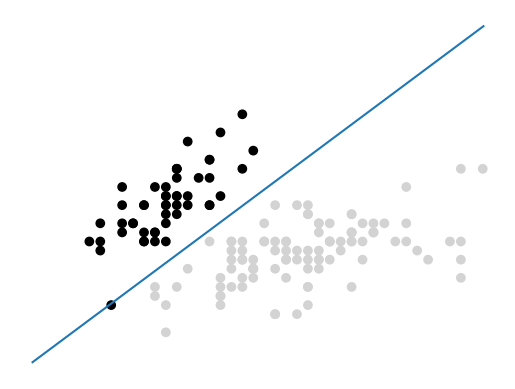

In [7]:
# Load library
from matplotlib import pyplot as plt

# Plot data points and color using their class
color = ["black" if c == 0 else "lightgrey" for c in target]
plt.scatter(features_standardized[:,0], features_standardized[:,1], c=color)

# Create the hyperplane
w = svc.coef_[0]
a=-w[0]/w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();

In this graphical representation, the data points belonging to class 0 are depicted as black, while those belonging to class 1 are shown as light gray. The hyperplane serves as the boundary that determines the classification of new observations. More precisely, any observation positioned above the line will be classified as class 0, whereas any observation below the line will be classified as class 1. This can be demonstrated by introducing a new observation in the top-left corner of the graph, indicating that it should be predicted as class 0.

In [8]:
# Create new observation
new_observation = [[ -2, 3]]

# Predict class of new observation
svc.predict(new_observation)

array([0])

There are several important points to consider regarding Support Vector Classifiers (SVCs). Firstly, in our illustration, we focused on a binary example with only two classes. However, SVCs are also capable of effectively handling multiple classes. Secondly, as demonstrated in our visualization, the hyperplane of an SVC is inherently linear and not curved. This was acceptable in our example since the data was linearly separable, implying the existence of a hyperplane that could accurately separate the two classes. However, it is crucial to acknowledge that in real-world scenarios, linear separability is seldom encountered.

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


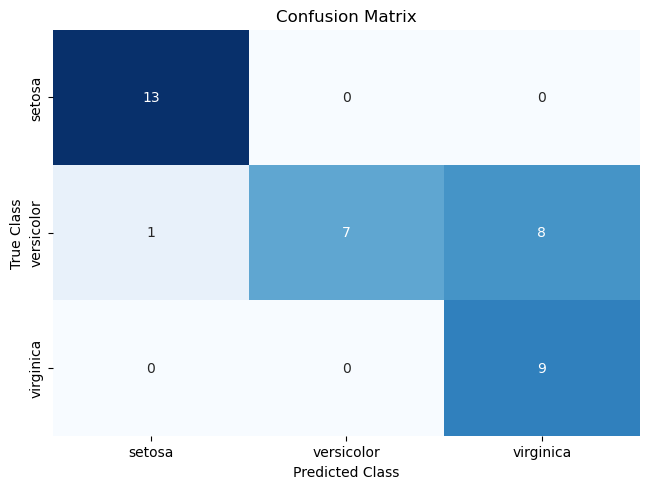

In [9]:
 # Load libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix

# Create list of target class names
class_names = iris.target_names

# Create training and test set
features_train, features_test, target_train, target_test = train_test_split(
        features, target, random_state=1)

target_predicted = svc.fit(features_train,
target_train).predict(features_test)

# Create confusion matrix
matrix = confusion_matrix(target_test, target_predicted) # Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()